In [1]:
# 이미지를 받아오기
import numpy as np
import PIL
from PIL import Image

img = PIL.Image.open("img2.bmp").convert("L")
imgarr = np.array(img) 

In [2]:
imgarr.shape

(503, 634)

In [3]:
imgarr = imgarr[:,65:569]

In [4]:
image = Image.fromarray(np.uint8(imgarr))
image = image.resize((28,28), PIL.Image.ANTIALIAS)

In [5]:
arr = np.array(image)

In [6]:
arr.shape

(28, 28)

In [7]:
arr = arr.reshape(784,-1)
arr.shape

(784, 1)

In [8]:
data = []
for i in (arr/255):
    data.append(float(i[0]))
    
print(data)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9882352941176471, 0.996078431372549, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9882352941176

실제 데이터 소스

In [9]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random

In [10]:
def generate_real():
    real_data = torch.FloatTensor(data)
    return real_data

In [11]:
generate_real()

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

판별기 만들기

In [12]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # 파이토치 부모 클래스 초기화
        super().__init__()
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(
#             nn.Linear(784,3),
#             nn.Sigmoid(),
#             nn.Linear(13,1),
#             nn.Sigmoid()
            nn.Linear(784,500),
            nn.Sigmoid(),
            nn.Linear(500,100),
            nn.Sigmoid(),
            nn.Linear(100,10),
            nn.Sigmoid(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
        
        # 손싫함수 설정
        self.loss_function = nn.MSELoss()
        
        # SGD 옵티마이저 설정
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        
        # 진행 측정을 위한 변수 초기화
        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    def train(self, inputs, targets):
        # 신경망 출력 계산
        outputs = self.forward(inputs)
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)
        
        # 카운터를 증가시키고 10회 마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ",self.counter)
            pass
        
        # 기울기를 초기화하고 역전파 후 가중치 갱신
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0), figsize=(16,8),alpha=0.1, marker='.', grid = True, yticks=(0,0.25,0.5))
        pass

판별기 테스트하기

In [13]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [14]:
random_data = torch.randint(low=0,high=255 ,size=(2,))

In [15]:
generate_random(784)

tensor([0.8892, 0.1862, 0.9181, 0.1611, 0.6887, 0.1699, 0.5522, 0.6565, 0.4175,
        0.4566, 0.3337, 0.7745, 0.8944, 0.0030, 0.3380, 0.9673, 0.9644, 0.3065,
        0.6842, 0.1764, 0.0790, 0.7606, 0.2643, 0.2256, 0.7261, 0.4097, 0.7773,
        0.9045, 0.1598, 0.3981, 0.9075, 0.8508, 0.7002, 0.7540, 0.9951, 0.7279,
        0.1154, 0.2752, 0.3172, 0.3157, 0.7081, 0.5723, 0.1748, 0.2602, 0.7457,
        0.9680, 0.6397, 0.7506, 0.6595, 0.6988, 0.9067, 0.4601, 0.4666, 0.7213,
        0.7428, 0.0092, 0.8248, 0.4103, 0.9867, 0.3878, 0.9302, 0.0584, 0.3384,
        0.8869, 0.4973, 0.9294, 0.1856, 0.9489, 0.6522, 0.9517, 0.4326, 0.2543,
        0.9313, 0.2307, 0.7569, 0.0452, 0.3617, 0.4152, 0.4834, 0.4263, 0.3952,
        0.2349, 0.1767, 0.4508, 0.2131, 0.0973, 0.3744, 0.5110, 0.8287, 0.3341,
        0.0551, 0.8591, 0.8792, 0.3190, 0.3131, 0.8007, 0.8576, 0.4109, 0.0777,
        0.5647, 0.3955, 0.1178, 0.9690, 0.5895, 0.9647, 0.9448, 0.7653, 0.0032,
        0.7355, 0.6098, 0.7330, 0.9559, 

In [16]:
%%time

D = Discriminator()

for i in range(10000):
    # 실제데이터
    D.train(generate_real(), torch.FloatTensor([1.0]))
    #생성된 데이터
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
Wall time: 46.7 s


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


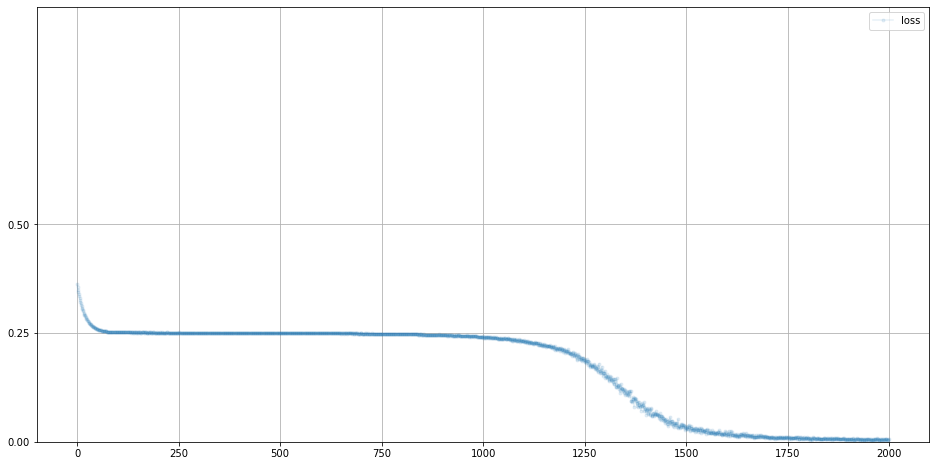

In [17]:
D.plot_progress()

In [18]:
# manually run discriminator to check it can tell real data from fake

print(D.forward( generate_real() ).item() )
print(D.forward( generate_random(784) ).item())

0.9343591332435608
0.06907791644334793


생성기 만들기

In [19]:
class Generator(nn.Module):
    
    def __init__(self):
        # 파이토치 부모 클래스 초기화
        super().__init__()
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.Sigmoid(),
            nn.Linear(10,100),
            nn.Sigmoid(),
            nn.Linear(100,500),
            nn.Sigmoid(),
            nn.Linear(500,784),
            nn.Sigmoid()
        )
        
        # 손실함수 설정할 필요가 없음
        # self.loss_function = nn.MSELoss()
        
        # SGD 옵티마이저 설정
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        
        # 진행 측정을 위한 변수 초기화
        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        # 신경망 출력 계산
        g_output = self.forward(inputs)
        
        # 판별기로 전달
        d_output = D.forward(g_output)
        
        # 오차 계산
        loss = D.loss_function(d_output, targets)
        
        # 카운터를 증가시키고 10회 마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        
        # 기울기를 초기화하고 역전파 후 가중치 갱신
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0), figsize=(16,8),alpha=0.1, marker='.', grid = True, yticks=(0,0.25,0.5))
        pass

생성기 결과 확인하기

In [20]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5016, 0.4237, 0.5362, 0.4789, 0.4933, 0.6338, 0.4726, 0.4688, 0.4404,
        0.5374, 0.4877, 0.5852, 0.5248, 0.4625, 0.5002, 0.5449, 0.6058, 0.5128,
        0.4641, 0.5920, 0.5455, 0.5284, 0.5495, 0.3802, 0.5096, 0.4309, 0.4722,
        0.3998, 0.5578, 0.5238, 0.4946, 0.4453, 0.3905, 0.6451, 0.5009, 0.3575,
        0.6605, 0.5283, 0.5693, 0.6039, 0.5400, 0.4403, 0.5451, 0.5567, 0.3956,
        0.6716, 0.5278, 0.5376, 0.5977, 0.4696, 0.4714, 0.5233, 0.5501, 0.5557,
        0.5739, 0.4837, 0.4950, 0.6450, 0.3278, 0.4358, 0.5087, 0.4485, 0.4849,
        0.4307, 0.4735, 0.5098, 0.5014, 0.4567, 0.5380, 0.3841, 0.4256, 0.4852,
        0.3976, 0.4337, 0.4228, 0.5222, 0.4100, 0.5530, 0.5759, 0.5123, 0.4954,
        0.4790, 0.3973, 0.4669, 0.4373, 0.4063, 0.5744, 0.4446, 0.4828, 0.4692,
        0.4949, 0.5027, 0.5452, 0.5803, 0.4721, 0.4258, 0.5546, 0.5409, 0.4088,
        0.4620, 0.5935, 0.5377, 0.5024, 0.5255, 0.4983, 0.4652, 0.6696, 0.5653,
        0.6472, 0.5763, 0.6082, 0.3760, 

GAN 훈련하기

In [21]:
%%time

# 판별기 및 생성기 생성
D = Discriminator()
G = Generator()
image_list = []
    
# 판별기와 생성기 훈련
for i in range(10000):
    
    # 1단계 : 참에 대해 판별기 훈련
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # 2단계 : 거짓에 대해 판별기 훈련
    # G의 기울기가 계산되지 않도록 detach() 함수를 이용
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # 3단계 : 생성기 훈련
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # 매 1000회 이미지를 저장
    if (i%1000 == 0):
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter =  10000
counter =  20000
Wall time: 1min 39s


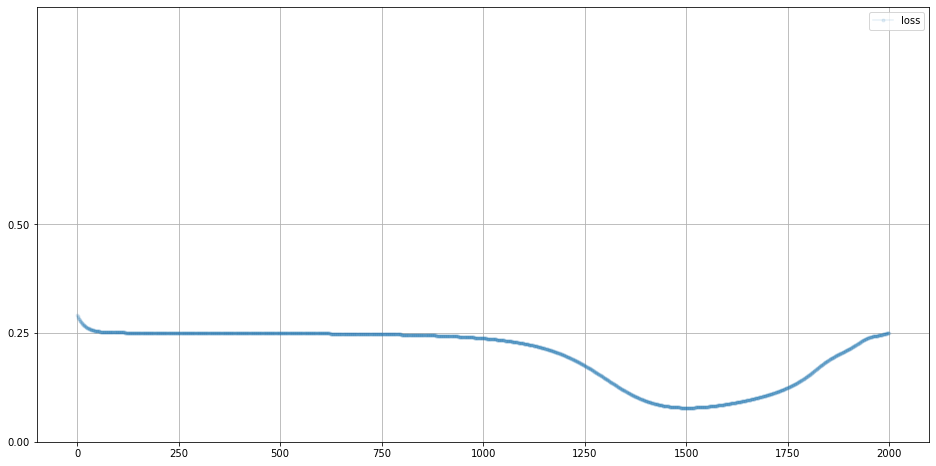

In [22]:
D.plot_progress()

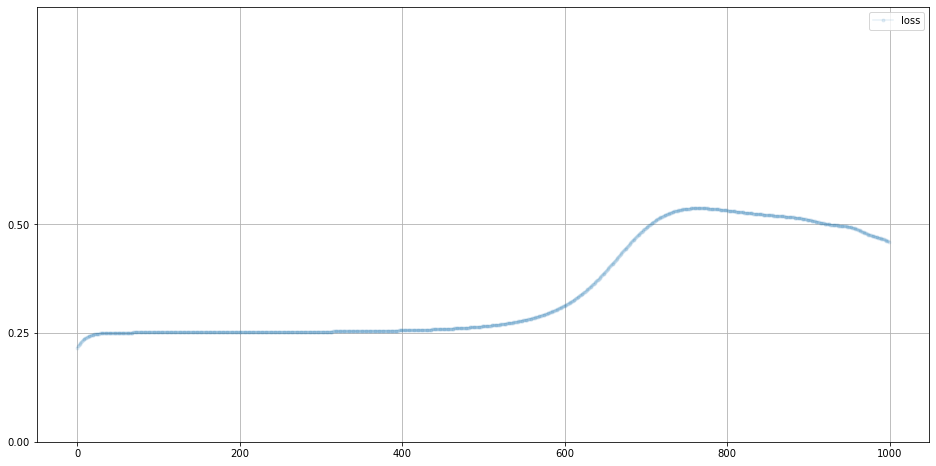

In [23]:
G.plot_progress()

In [34]:
image_tensor = G.forward(torch.FloatTensor([0.5]))

In [35]:
image_tensor

tensor([0.9602, 0.9609, 0.9627, 0.9484, 0.9520, 0.9605, 0.9554, 0.9568, 0.9614,
        0.9562, 0.9509, 0.9522, 0.9564, 0.9572, 0.9578, 0.9641, 0.9617, 0.9585,
        0.9589, 0.9594, 0.9634, 0.9568, 0.9569, 0.9651, 0.9592, 0.9610, 0.9664,
        0.9593, 0.9665, 0.9546, 0.9600, 0.9514, 0.9606, 0.9614, 0.9542, 0.9591,
        0.9592, 0.9642, 0.9574, 0.9634, 0.9581, 0.9569, 0.9660, 0.9585, 0.9523,
        0.9589, 0.9556, 0.9647, 0.9672, 0.9557, 0.9516, 0.9537, 0.9603, 0.9570,
        0.9610, 0.9533, 0.9614, 0.9583, 0.9588, 0.9602, 0.9640, 0.9537, 0.9560,
        0.9614, 0.9560, 0.9492, 0.9647, 0.9656, 0.9579, 0.9512, 0.9569, 0.9589,
        0.9592, 0.9528, 0.9592, 0.9629, 0.9578, 0.9519, 0.9553, 0.9525, 0.9543,
        0.9659, 0.9621, 0.9576, 0.9574, 0.9624, 0.9556, 0.9597, 0.9575, 0.9552,
        0.9643, 0.9643, 0.9617, 0.9622, 0.9593, 0.9488, 0.9605, 0.9510, 0.9559,
        0.9635, 0.9606, 0.9716, 0.9610, 0.9502, 0.9536, 0.9560, 0.9526, 0.9571,
        0.9600, 0.9613, 0.9643, 0.9606, 

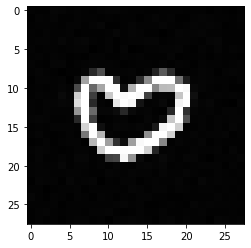

In [36]:
image_arr = image_tensor.detach().numpy()
image_arr = image_arr.reshape(28,28)
plt.imshow(image_arr, interpolation='none', cmap='Greys')
plt.show()

In [41]:
image1 = Image.fromarray(np.uint8(image_arr))
image1.save("Test1.bmp",'BMP')
image1

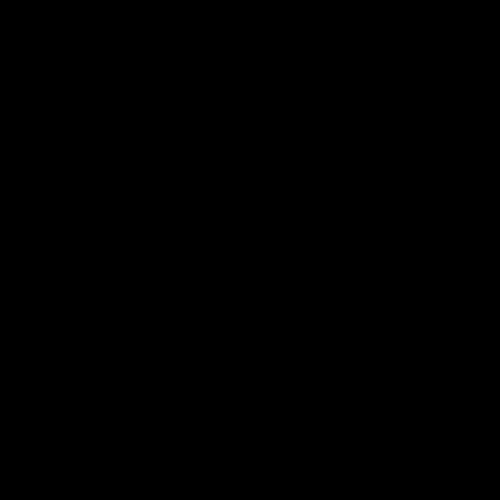

In [43]:
image2 = Image.fromarray(np.uint8(image_arr))
image2 = image.resize((500,500), PIL.Image.ANTIALIAS)
image2.save("Test2.bmp",'BMP')
image2

In [38]:
image.show()

In [44]:
test = PIL.Image.open("img4.bmp").convert("L")
testarr = np.array(test)
testarr.shape

(503, 634)

In [45]:
testarr = testarr[:,65:569]

test_image = Image.fromarray(np.uint8(testarr))
test_image = test_image.resize((28,28), PIL.Image.ANTIALIAS)

arr = np.array(test_image)
arr.shape

(28, 28)

In [46]:
# 판별기에 넣을 수 있는 형태로 바꿔주기 (2차원 행렬 -> 1차원 행렬)

arr = arr.reshape(784,-1)
print(arr.shape)

data = []
for i in (arr/255):  # 데이터 크기 때문에 나눠줌
    data.append(float(i[0]))  # 리스트 안에 리스트가 있는 형태여서 리스트 밖으로 꺼내줌

(784, 1)


In [47]:
test_data = torch.FloatTensor(data)

In [48]:
print(D.forward( test_data ).item() )

0.07529658079147339
